<a href="https://colab.research.google.com/github/innosevda/Predicting-House-Price/blob/main/House_Price_Prediction_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data for this project has been taken from Kaggle.com
To access the original source, use the following link: https://www.kaggle.com/datasets/shree1992/housedata/data

# Load the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv("data.csv")

# Display basic info
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# EDA

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df['city'].nunique()

44

In [ ]:
df['statezip'].nunique()

77

In [ ]:
df['statezip'].unique()[:10]  # See first 10 unique values

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105'],
      dtype=object)

In [ ]:
df[['state', 'zipcode']] = df['statezip'].str.split(' ', expand=True)

In [ ]:
df['zipcode'] = df['zipcode'].astype(int)

In [ ]:
zipcode_mean_price = df.groupby('zipcode')['price'].mean()
df['zip_price_avg'] = df['zipcode'].map(zipcode_mean_price)

In [ ]:
df = pd.get_dummies(df, columns=['state'])

In [ ]:
# creating dummies for city column

df = pd.get_dummies(df, columns=['city'], drop_first=True)

In [ ]:
# checking to see how many different countries' data I have, if only one country, I will drop country column
df['country'].nunique()

1

In [ ]:
df.drop(['date', 'street', 'statezip', 'country'], axis=1, inplace=True)

In [ ]:
df.drop(['state'], axis=1, inplace=True)

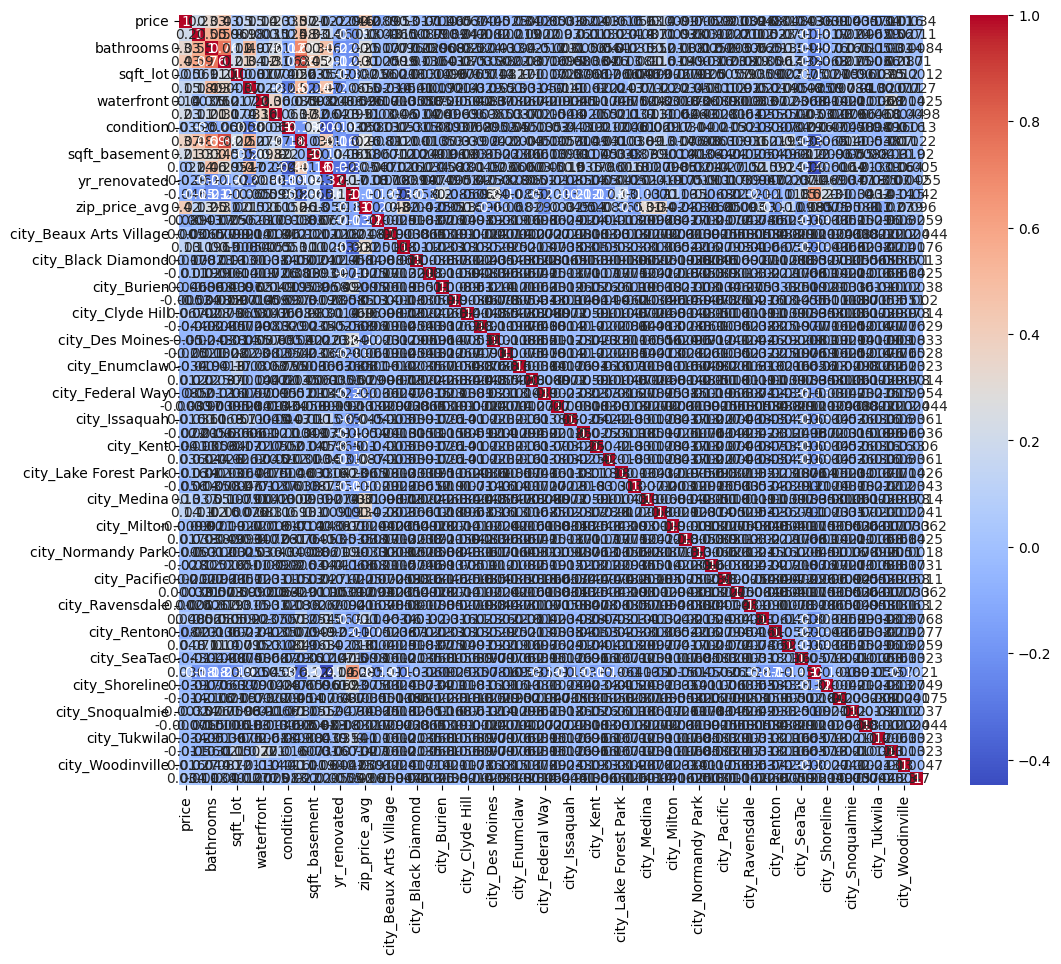

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df['age'] = 2014 - df['yr_built']

In [ ]:
df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)

In [ ]:
df = df[df['price'] < df['price'].quantile(0.95)]

In [ ]:
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

In [ ]:
df.drop(['city'], axis=1, inplace=True)

KeyError: "['city'] not found in axis"

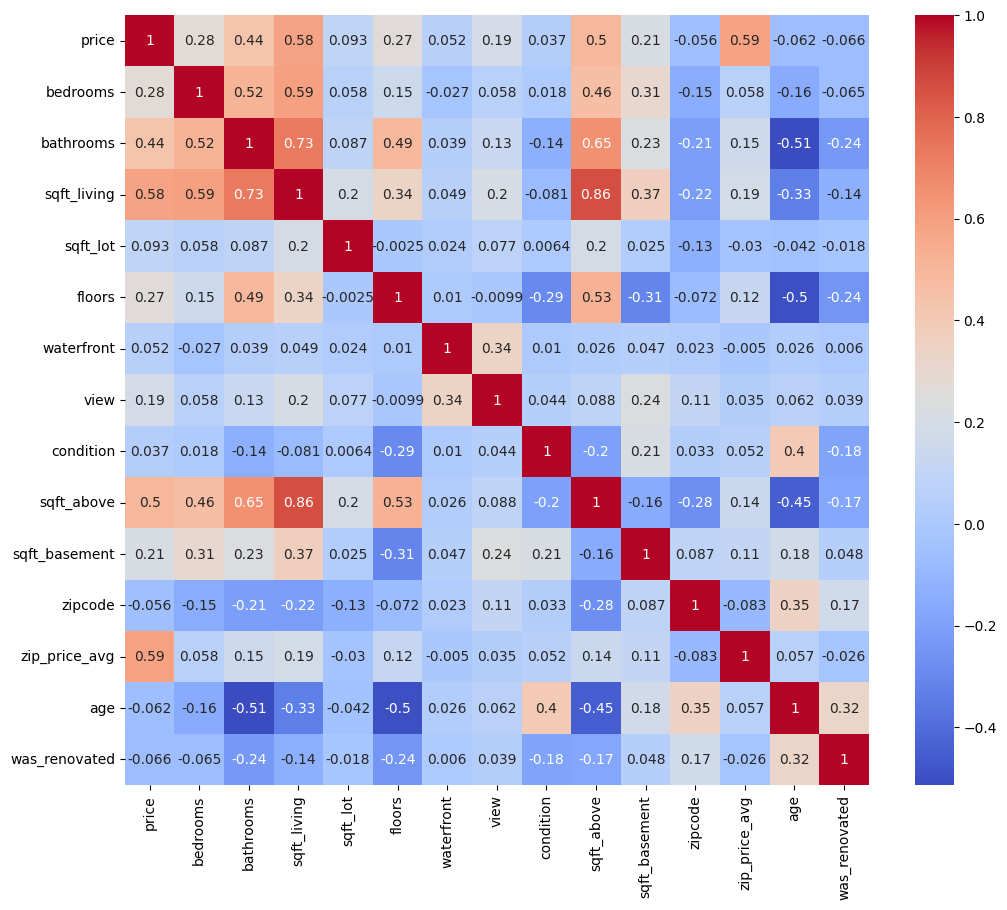

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Model Training

In [ ]:
# Set X and y
X = df.drop("price", axis=1)
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model on Linear Regression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.6758396110036875
RMSE: 127849.75177722795
MAE: 82967.09710526862


| Metric       | Description                                                                       |
| ------------ | --------------------------------------------------------------------------------- |
| **R² Score** | How well the model explains the variability in the target (closer to 1 is better) |
| **RMSE**     | Root Mean Squared Error (lower is better)                                         |
| **MAE**      | Mean Absolute Error (optional – gives average error in same units)                |


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("R² Score (XGBoost):", r2_score(y_test, y_pred_xgb))
print("RMSE (XGBoost):", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))

R² Score (XGBoost): 0.7126011911401899
RMSE (XGBoost): 120382.23404635311
MAE: 75363.4818829016


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predictions
gbr_preds = gbr.predict(X_test)

# Metrics
r2_gbr = r2_score(y_test, gbr_preds)
rmse_gbr = np.sqrt(mean_squared_error(y_test, gbr_preds))
mae_gbr = mean_absolute_error(y_test, gbr_preds)

print(f"R² Score (Gradient Boosting): {r2_gbr}")
print(f"RMSE (Gradient Boosting): {rmse_gbr}")
print(f"MAE (Gradient Boosting): {mae_gbr}")


R² Score (Gradient Boosting): 0.7014018725164671
RMSE (Gradient Boosting): 122705.33818158216
MAE (Gradient Boosting): 78410.43547223604


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Predictions
cat_preds = catboost_model.predict(X_test)

# Metrics
r2_cat = r2_score(y_test, cat_preds)
rmse_cat = np.sqrt(mean_squared_error(y_test, cat_preds))
mae_cat = mean_absolute_error(y_test, cat_preds)

print(f"R² Score (CatBoost): {r2_cat}")
print(f"RMSE (CatBoost): {rmse_cat}")
print(f"MAE (CatBoost): {mae_cat}")

R² Score (CatBoost): 0.7363822379089908
RMSE (CatBoost): 115294.14451813448
MAE (CatBoost): 72377.79357865117


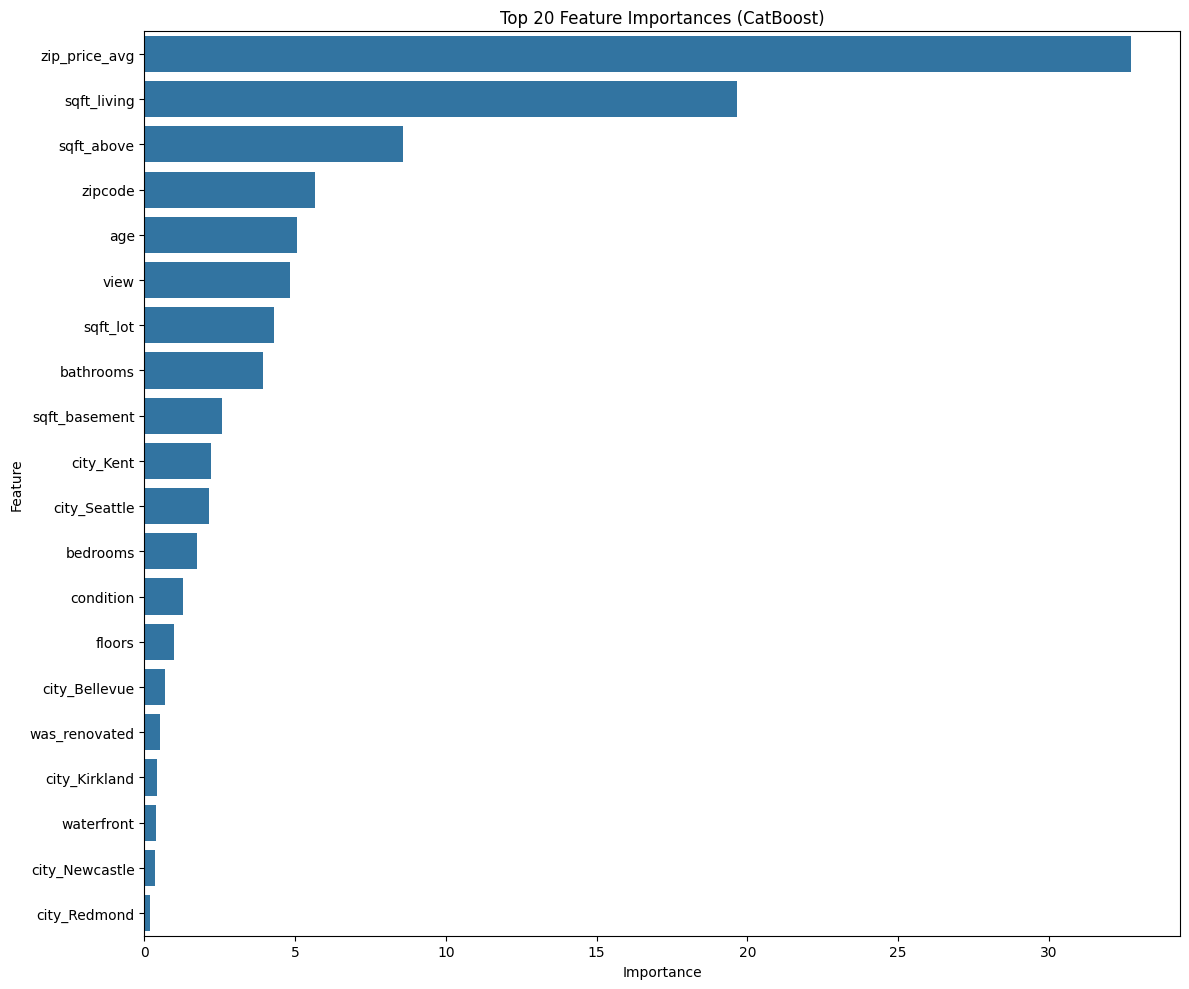

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have importance as a DataFrame called "feat_imp"
feat_imp = catboost_model.get_feature_importance(prettified=True)

plt.figure(figsize=(12, 10))
sns.barplot(x="Importances", y="Feature Id", data=feat_imp.sort_values("Importances", ascending=False).head(20))
plt.title("Top 20 Feature Importances (CatBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()